In [1]:
# LeedsNet2.py : It is a deep learning network created by @leopauly (cnlp@leeds.ac.uk)


import numpy
import glob
import sys
import datetime
from PIL import Image  
from scipy import misc
from scipy import ndimage
from matplotlib import pyplot 
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

from keras.datasets import mnist,cifar10
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import History,CSVLogger,ReduceLROnPlateau
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Using TensorFlow backend.


In [2]:
seed = 7
numpy.random.seed(seed)

In [3]:
#Load data base and give image propereties like hight, width etc.
imagefolderpath= ('./civildataset/') 
X=numpy.array([numpy.array(Image.open(str(imagefolderpath+str(i)+'.jpg')).convert('RGB'),'f') for i in range(1,211)])
print (X.shape)  
img_rows=100;
img_cols=100;
channel=3;
nb_classes=6



(210, 100, 100, 3)


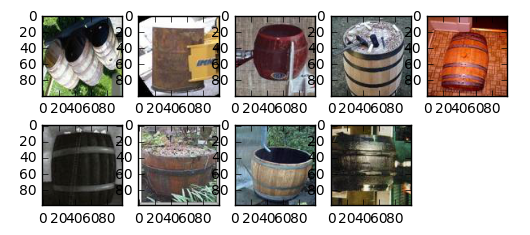

(210, 100, 100, 3)


In [4]:
#to display and check if all images are loaded correctly

lower_range=20;
upper_range=29;

for i in range(lower_range, upper_range):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(misc.toimage(X[i]))
pyplot.show()
print(X.shape)

In [5]:
y_1=numpy.array([(0) for i in range (1,36)]);
y_2=numpy.array([(1) for i in range (36,71)]);
y_3=numpy.array([(2) for i in range (71,106)]);
y_4=numpy.array([(3) for i in range (106,141)]);
y_5=numpy.array([(4) for i in range (141,176)]);
y_6=numpy.array([(5) for i in range (176,211)]);
   
y_7=numpy.append(y_1,y_2)
y_8=numpy.append(y_3,y_4)
y_9=numpy.append(y_5,y_6)

y_10=numpy.append(y_7,y_8)
y=numpy.append(y_10,y_9)

print (y.shape) 
#print (y)


(210,)


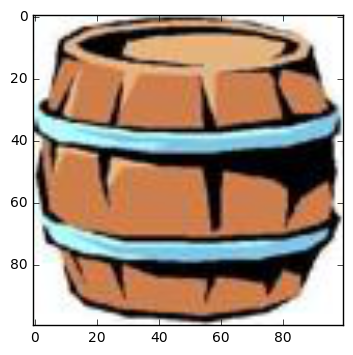

0


In [6]:
#to display and check if images and labels are in order
def checker(check):
   myimage = array_to_img(X[check])
   pyplot.imshow(myimage)
   pyplot.show()
   print(y[check])
    
checker(2)

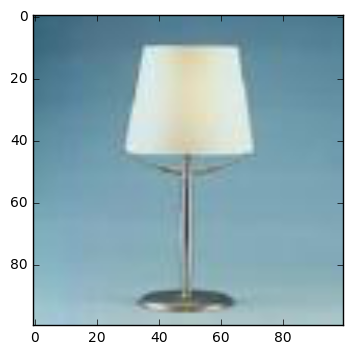

2


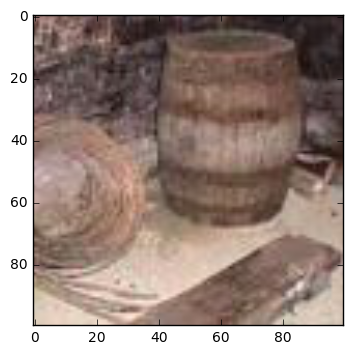

0


In [7]:
X,y = shuffle(X,y, random_state=1)
X,y = shuffle(X,y, random_state=2)

checker(2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=4)

myimage = array_to_img(X_train[2])
pyplot.imshow(myimage)
pyplot.show()
print (y_train[2])




(209, 100, 100, 3)
(1, 100, 100, 3)
(209, 100, 100, 3)
(1, 100, 100, 3)


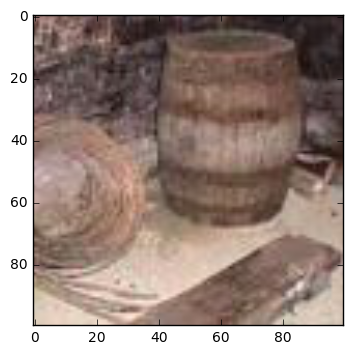

0
(209,)
(1,)
(209, 6)
(1, 6)


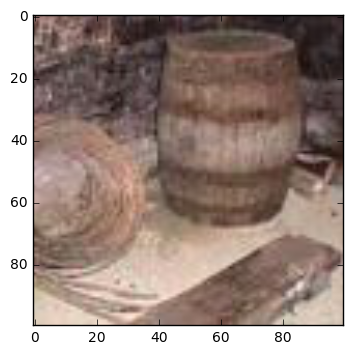

[ 1.  0.  0.  0.  0.  0.]


In [8]:
#reshaping the input and output values

print (X_train.shape)
print (X_test.shape)

K.set_image_dim_ordering('tf')
X_train = X_train.reshape(X_train.shape[0],img_rows, img_cols,channel)
X_test = X_test.reshape(X_test.shape[0],img_rows, img_cols,channel)
input_shape=(img_rows,img_cols,channel)

print (X_train.shape)
print (X_test.shape)

myimage = array_to_img(X_train[2])
pyplot.imshow(myimage)
pyplot.show()
print (y_train[2])


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255.
X_test /= 255.

print (y_train.shape)
print (y_test.shape)

y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

print (y_train.shape)
print (y_test.shape)

myimage = array_to_img(X_train[2])
pyplot.imshow(myimage)
pyplot.show()
print (y_train[2])

#checker(11)

In [9]:
LeedsNet = Sequential()
LeedsNet.add(Convolution2D(16, 3, 3, input_shape=input_shape, activation='relu',border_mode='valid'))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(Convolution2D(32, 3, 3, activation='relu', border_mode='valid'))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(MaxPooling2D(pool_size=(2, 2)))

LeedsNet.add(Flatten())
LeedsNet.add(Dense(256, activation='relu', W_constraint=maxnorm(3)))
LeedsNet.add(Dropout(0.5))
LeedsNet.add(Dense(nb_classes, activation='softmax'))

In [10]:
epochs = 50
lrate = 0.01
sgd = SGD(lr=lrate, momentum=0.9, nesterov=True)
LeedsNet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [11]:
b_size=36
#csv_logger = CSVLogger('trainingLeedsnet2.log',separator=',', append=True)
#reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.1, patience=10, min_lr=0.0001, epsilon=0.001)
start_time=datetime.datetime.now()
print (start_time)

history=LeedsNet.fit(X_train, y_train, nb_epoch=epochs, 
                     batch_size=b_size, validation_split=0.2, 
                     shuffle='batch')#, callbacks=[reduce_lr,csv_logger])

end_time=datetime.datetime.now()
print (end_time)

2017-02-09 17:13:35.568529
Train on 167 samples, validate on 42 samples
Epoch 1/50
167/167 [==============================] - 4s - loss: 1.8995 - acc: 0.1677 - val_loss: 1.7915 - val_acc: 0.0952
Epoch 2/50
167/167 [==============================] - 2s - loss: 1.8628 - acc: 0.1557 - val_loss: 1.7882 - val_acc: 0.0952
Epoch 3/50
167/167 [==============================] - 3s - loss: 1.8460 - acc: 0.2335 - val_loss: 1.7861 - val_acc: 0.1429
Epoch 4/50
167/167 [==============================] - 3s - loss: 1.8264 - acc: 0.2275 - val_loss: 1.7795 - val_acc: 0.2143
Epoch 5/50
167/167 [==============================] - 3s - loss: 1.7913 - acc: 0.2575 - val_loss: 1.7790 - val_acc: 0.2143
Epoch 6/50
167/167 [==============================] - 2s - loss: 1.7660 - acc: 0.2814 - val_loss: 1.7635 - val_acc: 0.2619
Epoch 7/50
167/167 [==============================] - 2s - loss: 1.7636 - acc: 0.3234 - val_loss: 1.7525 - val_acc: 0.2143
Epoch 8/50
167/167 [==============================] - 3s - loss: 1.

In [12]:
#scores = LeedsNet.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))

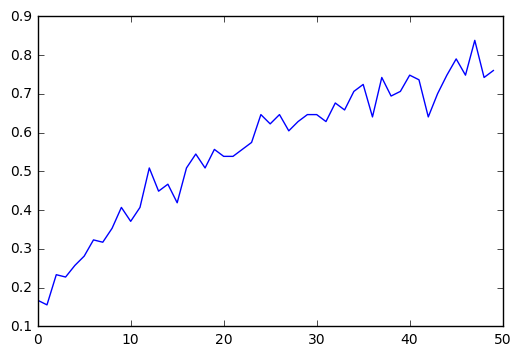

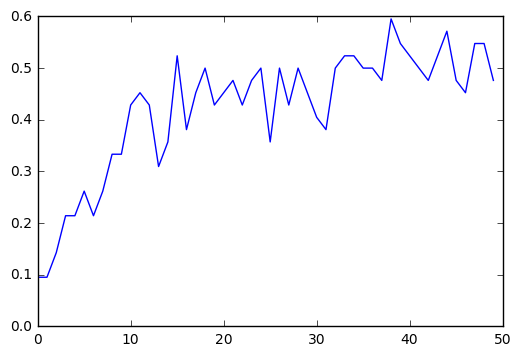

In [13]:
pyplot.plot(history.history['acc'])
pyplot.show()


pyplot.plot(history.history['val_acc'])
pyplot.show()

In [14]:
#Preparing documentation
import sys
sys.stdout = open('LeedsNet2log.txt', 'a')

print("\n",'LeedsNet < New Attempts Next> : Results when LeedsNet2 was trained on My civil dataset dataset',"\n")
print("\n",'Network architechture',"\n")
print(LeedsNet.summary())
print("\n",'Results: Colomn headings',"\n",history.history.keys())
print("\n",'Results: Training',"\n",history.history,"\n")
print("\n",'Time taken for training',"\n",' Start Time:', start_time,"\n",'End Time:', end_time,"\n")
#print("\n","Accuracy on testing data: %.2f%%" % (scores[1]*100),"\n")

#sys.stdout.close()
